# 0. Preparation

What you need first of first
1. openmpi
2. conda

## prepare conda environment

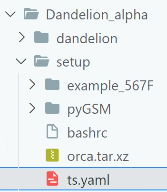
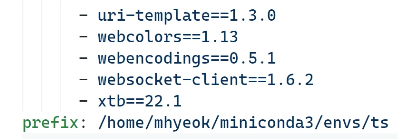

Change 'mhyeok' to your user name!


conda env create -f ts.yaml

## Install pygsm

conda activate ts

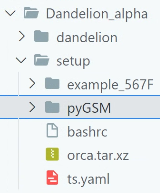

pip install -e .

move pyGSM folder to the /home/'yourname'/package

## Install Orca

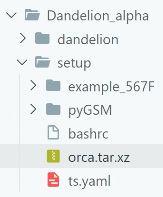

tar -xf orca.tar.xz

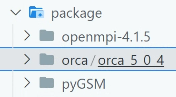

move orca folder to package folder too.

## set environment variable

export PATH="/home/mhyeok/package/orca/orca_5_0_4:$PATH" \
export PYTHONPATH=/home/mhyeok/package/pyGSM:$PYTHONPATH \
export OMP_STACKSIZE=16G \
ulimit -s unlimited\
export OMP_NUM_THREADS=1

Be sure to change 'mhyeok' to your home name!

# 1. Single-ended Growing String method

### 1_create_gsm_jobs.ipynb

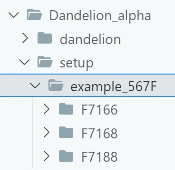


We are going to use 'example_567F' folder for the manifest.

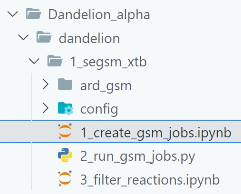

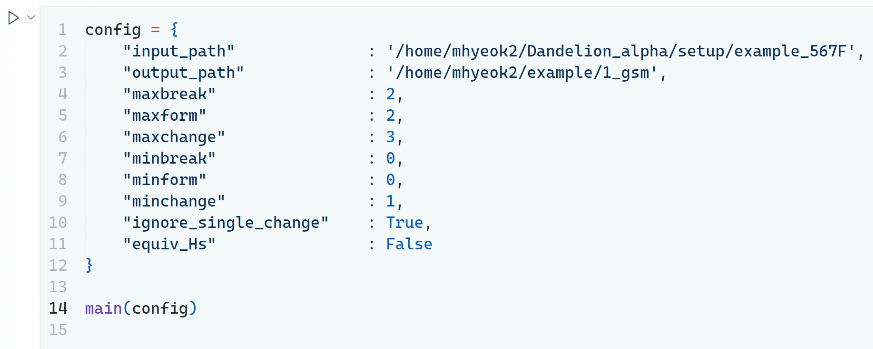

Change 'input_path' and 'output_path' in the config,\
input_path should bear mother structures' xyz files.\
output_path will have jobs for segsm driving coordinates.

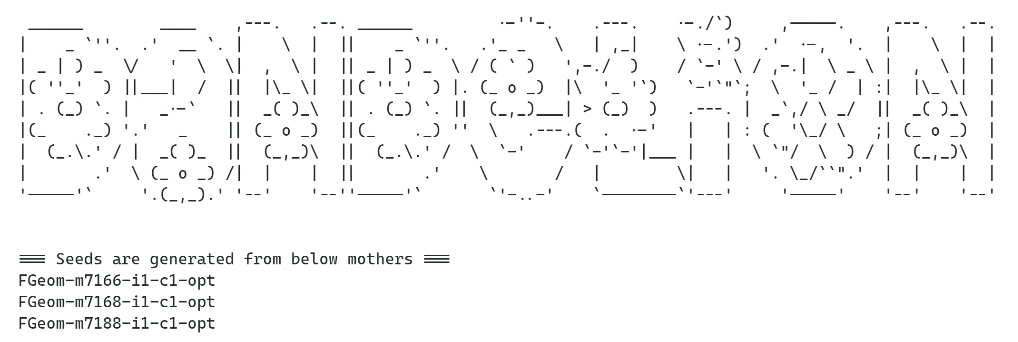

Run the cells, Seeds(driving coords) are generated from mother structures.

### 2_run_gsm_jobs.py

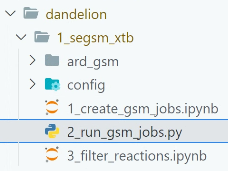

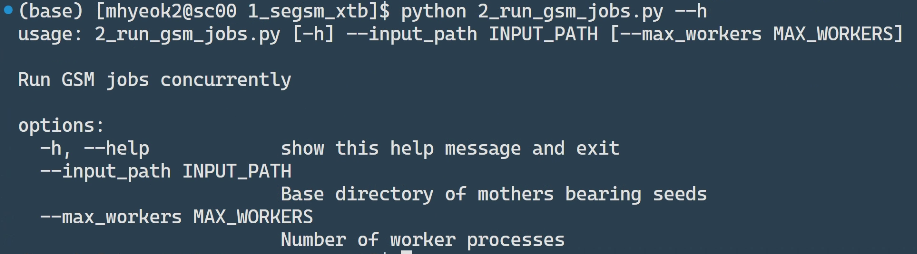

run like

python 2_run_gsm_jobs.py --input_path /home/mhyeok2/example/1_gsm --max_workers 10

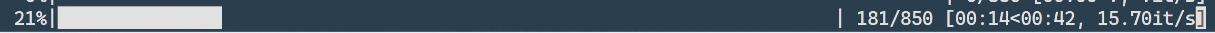

progress bar will be shown, It is running 10 threads on 850 seeds

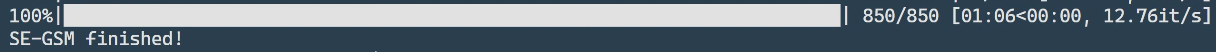

### 3_filter_reactions.ipynb

As GSM is not perfect, we should filter out the odd reactions on criterias

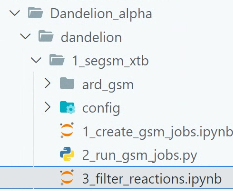

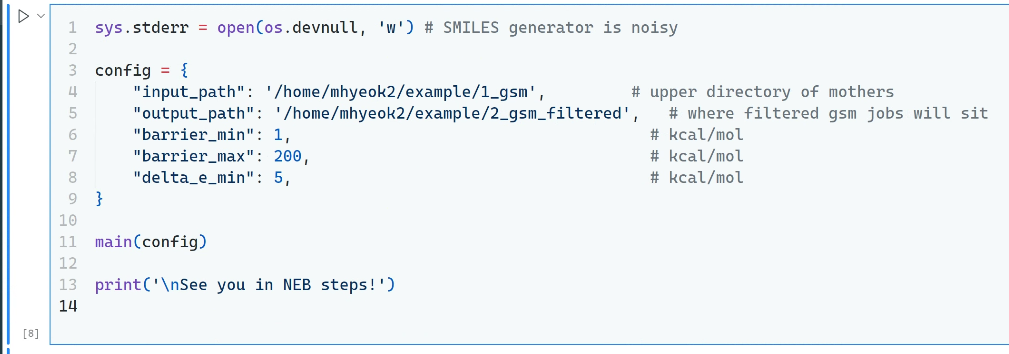

Change the input_path and output_path

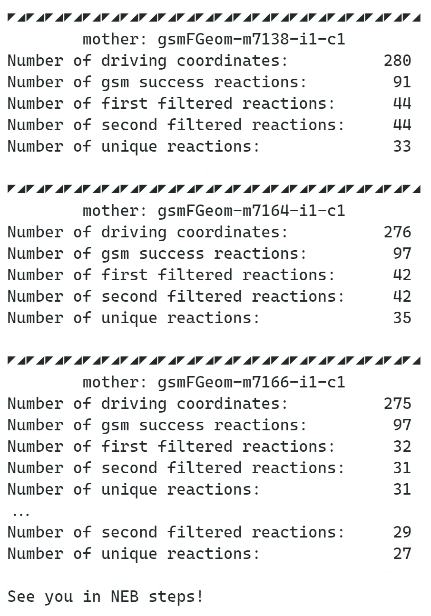

Run the cells, about 10% of the driving coordinates were survived

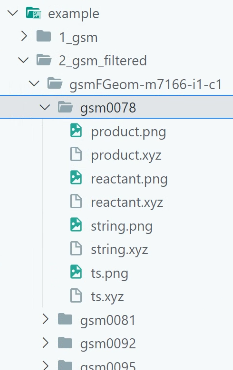

output_path 2_gsm_filtered has survived (reactant, ts, product) pairs.

# 2. Nudged elastic band

### 1_neb_xtb.py

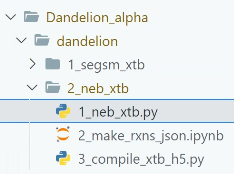

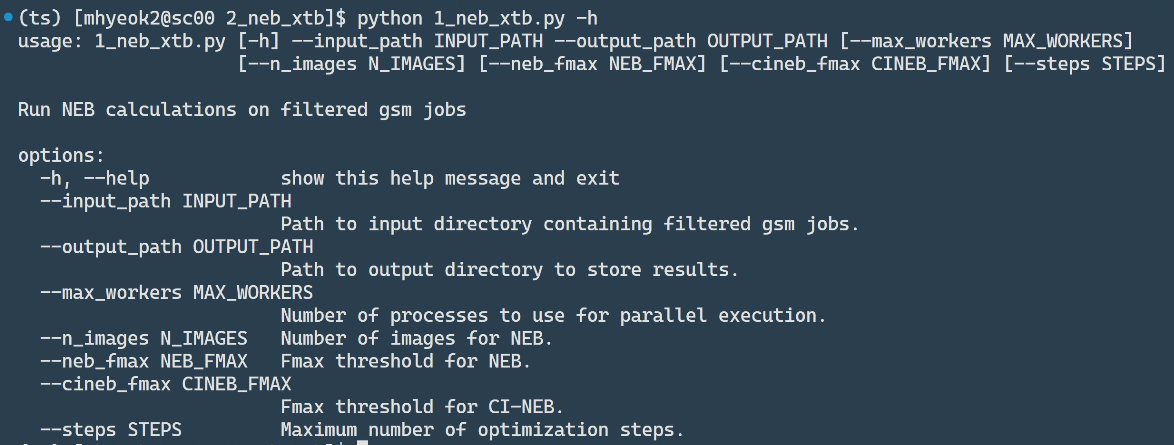

run like\
python 1_neb_xtb.py --input_path /home/mhyeok2/example/2_gsm_filtered --output_path /home/mhyeok2/example/3_neb --max_workers 10

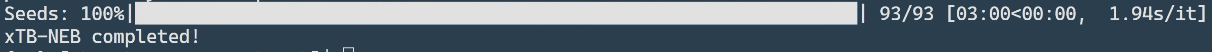

not gonna take too long

### 2_make_rxns_json.ipynb

neb also fails to converge, we should filter them out

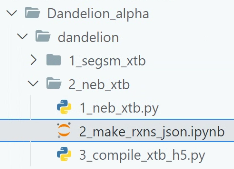

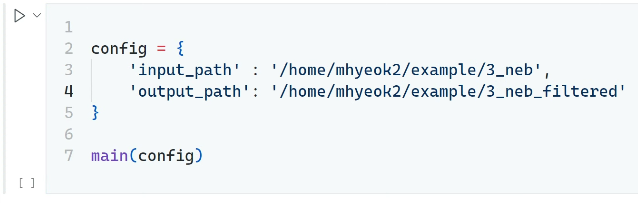

Run the cells, 

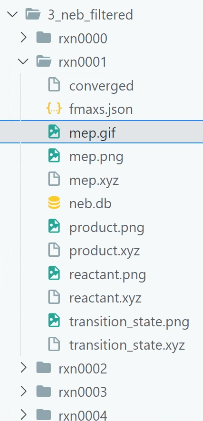

You should find many helpful informatins about the specific reactions.\
neb.db has all (like 8000 points) structure-force-energy pairs

### 3_compile_xtb_h5.py

We should compoile those neb.db 's to the single db file.\
And we will cut off 8000 points in the criteria of f_max in the neb procedure.

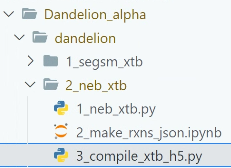

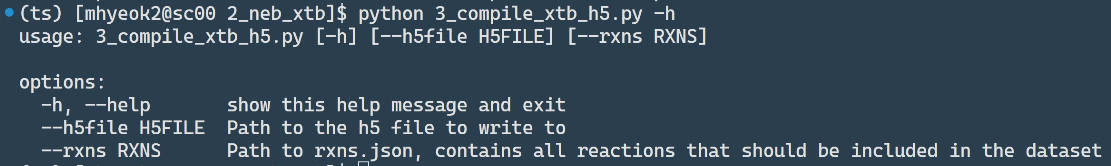

Use like \
python --rxns /home/mhyeok2/example/3_neb_filtered --h5file /home/mhyeok2/example/xtb.h5

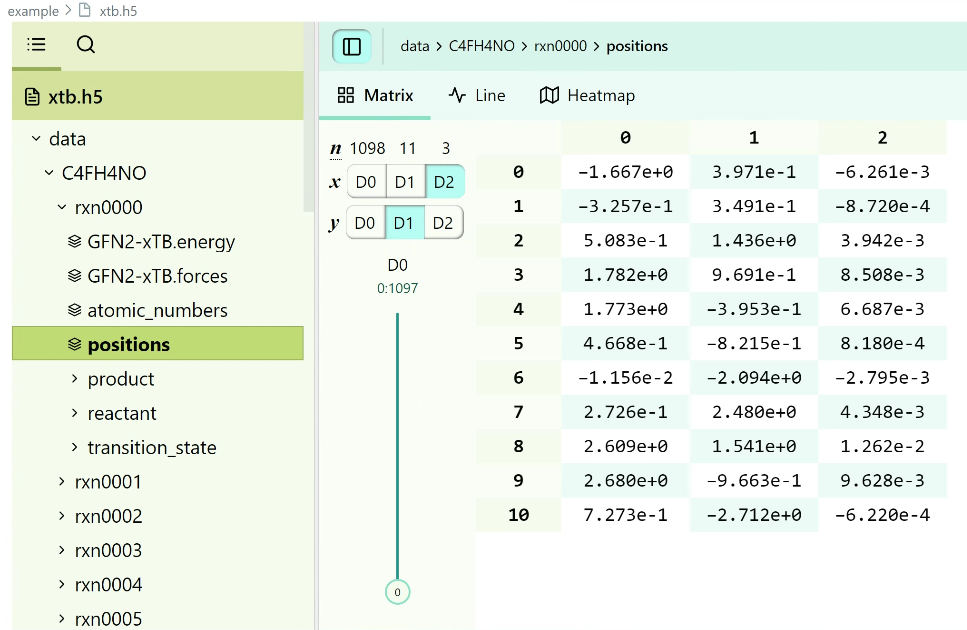

xtb.h5 file is the gigantic db file which has\
atomic_numbers, positions, forces, energies sampled

# 3. wB97X/6-31g(d) refinement

### 1_wb97x_on_xtb_h5.py

We should refine the energies, force values calculated from the xTB\
And It is going to the rate determining step of the whole scheme.

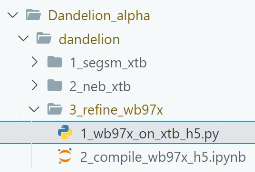

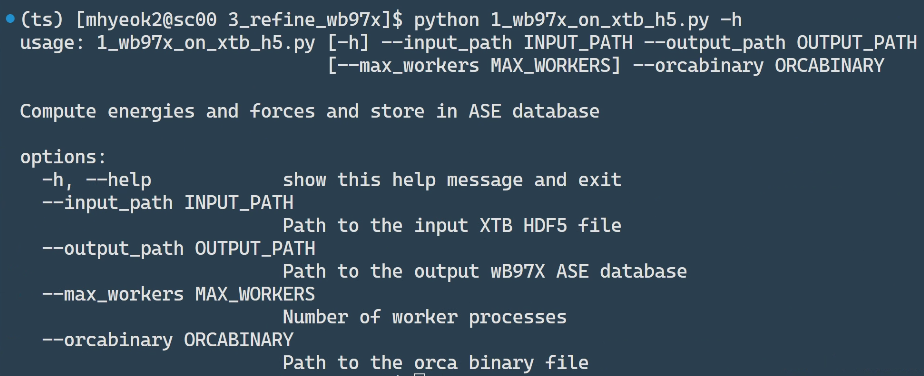

use like\
python 1_wb97x_on_xtb_h5.py --input_path /home/mhyeok2/example/xtb.h5 --output_path /home/mhyeok2/example/wb97.db --max_workers 40 --orcabinary /home/mhyeok2/package/orca/orca_5_0_4/orca

Use many workers will help

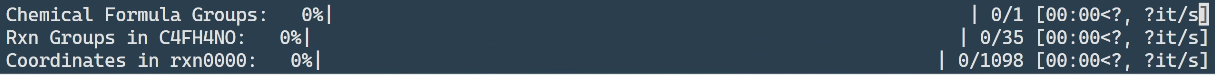

On average, \
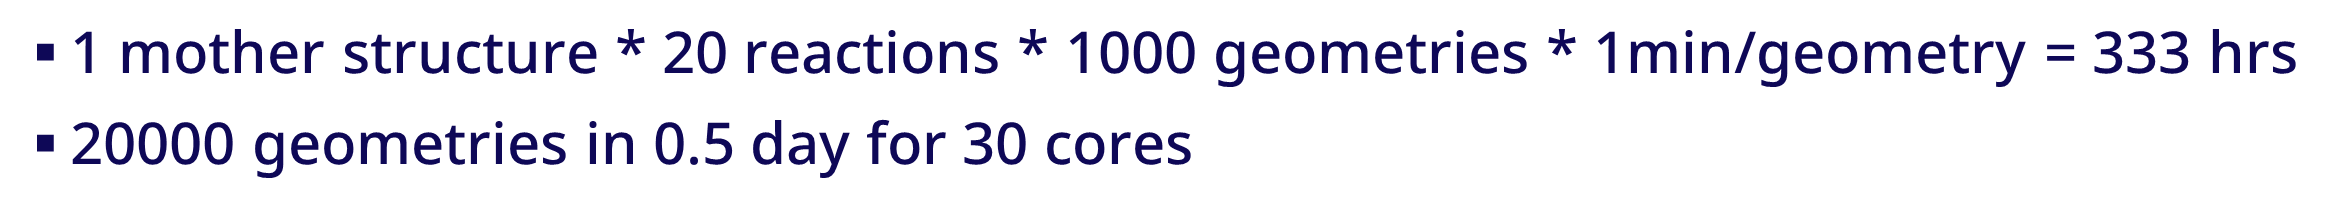

### 2_compile_wb97x_h5.ipynb

Optional, this code will transform wb97x.db (ase db format) into wb97x.h5 (hdf5 format)

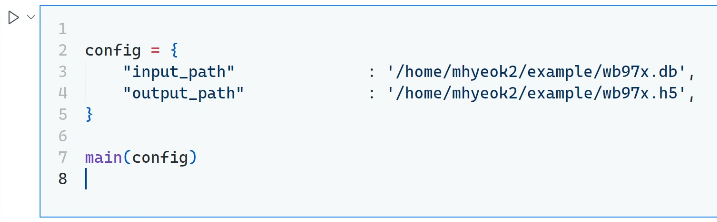

Happy coding!